In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

/home/teresa/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
songs = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")
songs

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381
2,2,ABBA,As Good As New,i'll never know why i had to go why i had to ...,1438
3,3,ABBA,Bang,making somebody happy is a question of give an...,1207
4,4,ABBA,Bang-A-Boomerang,making somebody happy is a question of give an...,1223
...,...,...,...,...,...
50827,57642,Ziggy Marley,Friend,i wanna thank you for the things you've done...,691
50828,57643,Ziggy Marley,G7,seven richest countries in the world them hav...,1443
50829,57644,Ziggy Marley,Generation,many generation have passed away fighting for...,1391
50830,57645,Ziggy Marley,Good Old Days,irie days come on play let the angels fly let...,858


In [3]:
c = Counter(songs.artist).most_common()[10:]

In [4]:
sample = songs.copy()
for el in c:
    sample = sample[sample.artist!=el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens
334,361,Alabama,Calling All Angels,calling calling all angels oh i'm calling c...,1425
335,362,Alabama,Can't Keep A Good Man Down,i thought it was forever i thought it would l...,1714
336,363,Alabama,Carolina Mountain Dew,somewhere in the mountains......... in norther...,1138
337,364,Alabama,Christmas In Dixie,by now in new york city there's snow on the g...,668
338,365,Alabama,Christmas In Your Arms,all my friends are asking me where i plan to s...,926
...,...,...,...,...,...
45431,50506,Reba Mcentire,Old Man River,(ronny scaife danny hogan) cool breeze on ...,754
45432,50507,Reba Mcentire,On My Own,so many times i said it was forever said our ...,1260
45433,50508,Reba Mcentire,"One Child, One Day",three wise men a shining star a mother and a...,636
45434,50509,Reba Mcentire,One Promise Too Late,i would have waited forever if i'd known that...,613


In [15]:
def visualize_tsne(X_embedded, hue, figname):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=hue, marker="o", palette=sns.color_palette("hls", 10))
    plt.title("Songtexte")
    #plt.savefig(figname)
    plt.show()

In [27]:
data = TfidfVectorizer(max_features=2000).fit_transform(sample.text)

X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(data)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1876 samples in 0.006s...
[t-SNE] Computed neighbors for 1876 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1876
[t-SNE] Computed conditional probabilities for sample 1876 / 1876
[t-SNE] Mean sigma: 0.030886
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 91.1055374, gradient norm = 0.0000781 (50 iterations in 1.152s)
[t-SNE] Iteration 100: error = 81.3902740, gradient norm = 0.0056523 (50 iterations in 1.299s)
[t-SNE] Iteration 150: error = 78.8825836, gradient norm = 0.0007678 (50 iterations in 1.153s)
[t-SNE] Iteration 200: error = 78.5932922, gradient norm = 0.0004837 (50 iterations in 1.064s)
[t-SNE] Iteration 250: error = 78.5125122, gradient norm = 0.0003725 (50 iterations in 1.075s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.512512
[t-SNE] Iteration 300: error = 2.9675241, gradient norm = 0.0058637 (50 iterations in 1.361s)

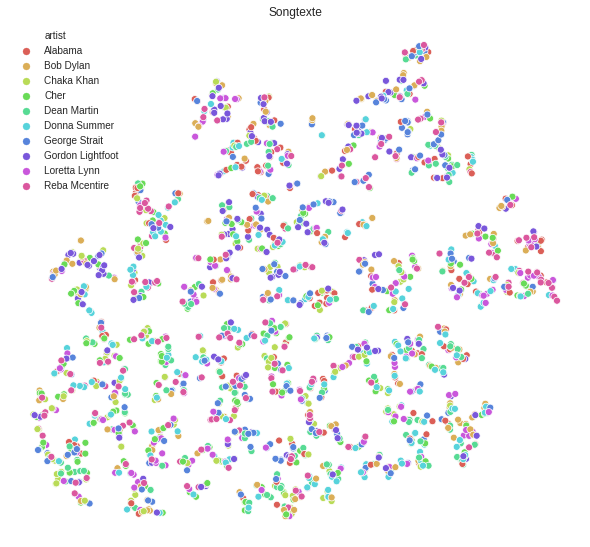

In [29]:
# perplexity = [2,5,10,30,40,50,100]
perplexity = [10]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, n_iter=3000,learning_rate=10, verbose=2).fit_transform(X_reduced)
    figname = "tsne_coloredbytext_perplexity"+str(p)
    visualize_tsne(X_embedded, sample.artist, figname)